<a href="https://colab.research.google.com/github/Daksh2179/Daksh2179/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 6220 - Homework 1: Iris Classification Pipeline
## Daksh Patel
## 10th Sept 2025

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
!wget -O iris.data https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

!ls -la iris.data

--2025-09-15 17:42:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.data’

iris.data               [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-09-15 17:42:02 (40.3 MB/s) - ‘iris.data’ saved [4551]

-rw-r--r-- 1 root root 4551 Sep 15 17:42 iris.data


In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df = pd.read_csv('iris.data', names=column_names)

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nClass distribution:")
print(df['class'].value_counts())

Dataset Shape: (150, 5)

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Class distribution:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


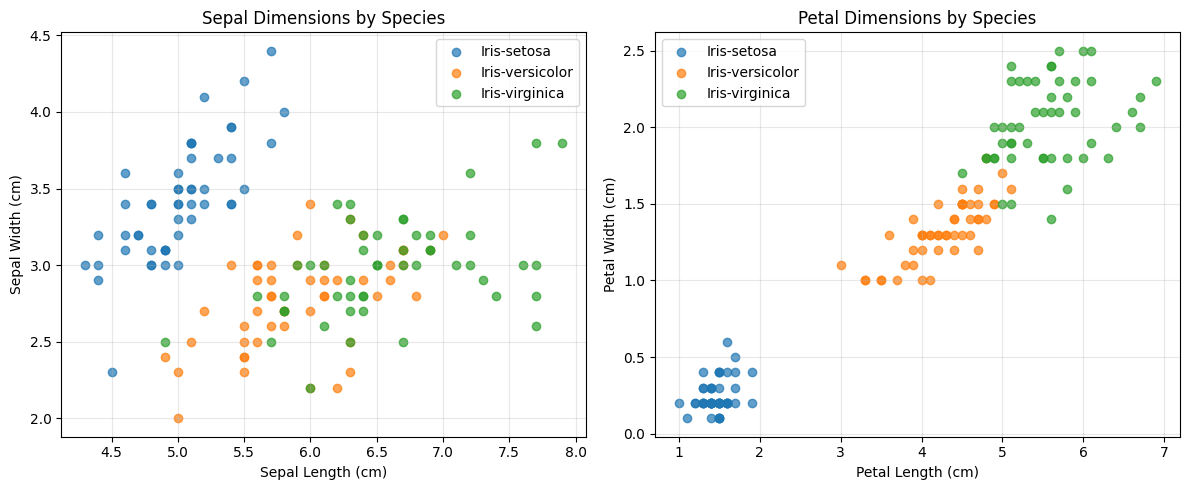

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#plot 1:sepal dimensions
ax1 = axes[0]
for species in df['class'].unique():
    subset = df[df['class'] == species]
    ax1.scatter(subset['sepal_length'], subset['sepal_width'], label=species, alpha=0.7)
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('Sepal Dimensions by Species')
ax1.legend()
ax1.grid(True, alpha=0.3)

#plot 2:petal dimensions
ax2 = axes[1]
for species in df['class'].unique():
    subset = df[df['class'] == species]
    ax2.scatter(subset['petal_length'], subset['petal_width'], label=species, alpha=0.7)
ax2.set_xlabel('Petal Length (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Petal Dimensions by Species')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
X = df.drop('class', axis=1)
y = df['class']

# split 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Total samples: {len(df)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

Total samples: 150
Training samples: 120 (80.0%)
Test samples: 30 (20.0%)


In [7]:
#building pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=200, random_state=42))
])

# Measure training time
start_time = time.time()

# Train the pipeline
pipeline.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"Pipeline successfully trained!")
print(f"Training time: {training_time:.4f} seconds")

Pipeline successfully trained!
Training time: 0.0229 seconds


In [8]:
start_time = time.time()

#predictions
y_pred = pipeline.predict(X_test)

testing_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Testing time: 0.0032 seconds
Test Accuracy: 0.9333 (93.33%)


<Figure size 800x600 with 0 Axes>

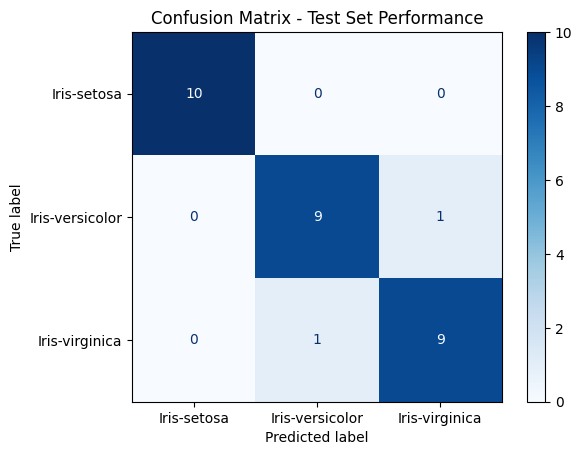

In [9]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=pipeline.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Set Performance')
plt.show()

In [14]:
print(" FINAL RESULTS SUMMARY ".center(40))

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

         FINAL RESULTS SUMMARY          
Training Time: 0.0229 seconds
Testing Time: 0.0032 seconds
Test Accuracy: 0.9333 (93.33%)
